# Housing Pricing Regression

## Importing Libraries and Data

In [320]:
#!pip install pandas
#!pip install Pyarrow
#!pip install sklearn
#!pip install seaborn
#!pip install mathplotlib
#!pip install statsmodels


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sma

In [321]:
df = pd.read_csv("data/train.csv")

## Data Understanding

In [322]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [323]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [324]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [325]:
df.shape

(1460, 81)

In [326]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [327]:
pd.set_option('display.max_rows', None) #con: does it for everything so can make things look lengthy, ran reset with pd.reset_option('display.max_rows')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Pre-Processing

In [328]:
df['LotFrontage'].head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

In [329]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [330]:
df['LotFrontage'].fillna(0.0, inplace=True)

In [331]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,   0.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [332]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [333]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [334]:
df['Alley'].fillna('None', inplace=True)

In [335]:
df['Alley'].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [336]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [337]:
df['MasVnrType'].fillna('None', inplace=True)

In [338]:
df['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [339]:
df['MasVnrArea'].fillna(0.0, inplace=True)

In [340]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [341]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [342]:
df['BsmtQual'].fillna('None', inplace=True)

In [343]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [344]:
df['BsmtCond'].fillna('None', inplace=True)

In [345]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [346]:
df['BsmtExposure'].fillna('None', inplace=True)

In [347]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [348]:
df['BsmtFinType1'].fillna('None', inplace=True)

In [349]:
df['BsmtFinType2'].fillna('None', inplace=True)

In [350]:
df.shape

(1460, 81)

In [351]:
df.dropna(axis=0, subset=['Electrical'], inplace=True)

In [352]:
df.shape

(1459, 81)

In [353]:
df['FireplaceQu'].fillna('None', inplace=True)

In [354]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [355]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [356]:
df['GarageType'].fillna('None', inplace=True)

In [357]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [358]:
df['GarageYrBlt'].fillna(0.0, inplace=True)

In [359]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [360]:
df['GarageFinish'].fillna('None', inplace=True)

In [361]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [362]:
df['GarageQual'].fillna('None', inplace=True)

In [363]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [364]:
df['GarageCond'].fillna('None', inplace=True)

In [365]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [366]:
df['PoolQC'].fillna('None', inplace=True)

In [367]:
df['Fence'].fillna('None', inplace=True)

In [368]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [369]:
df['MiscFeature'].fillna('None', inplace=True)

In [370]:
df_preLE = df.copy()

In [371]:
from sklearn.preprocessing import LabelEncoder

In [372]:
le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])



In [373]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
Alley              int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
MasVnrType         int32
MasVnrArea       float64
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtQual           int32
BsmtCond           int32
BsmtExposure       int32
BsmtFinType1       int32
BsmtFinSF1         int64
BsmtFinType2       int32
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32


In [374]:
df['GarageQual'].unique()

array([5, 1, 2, 3, 0, 4])

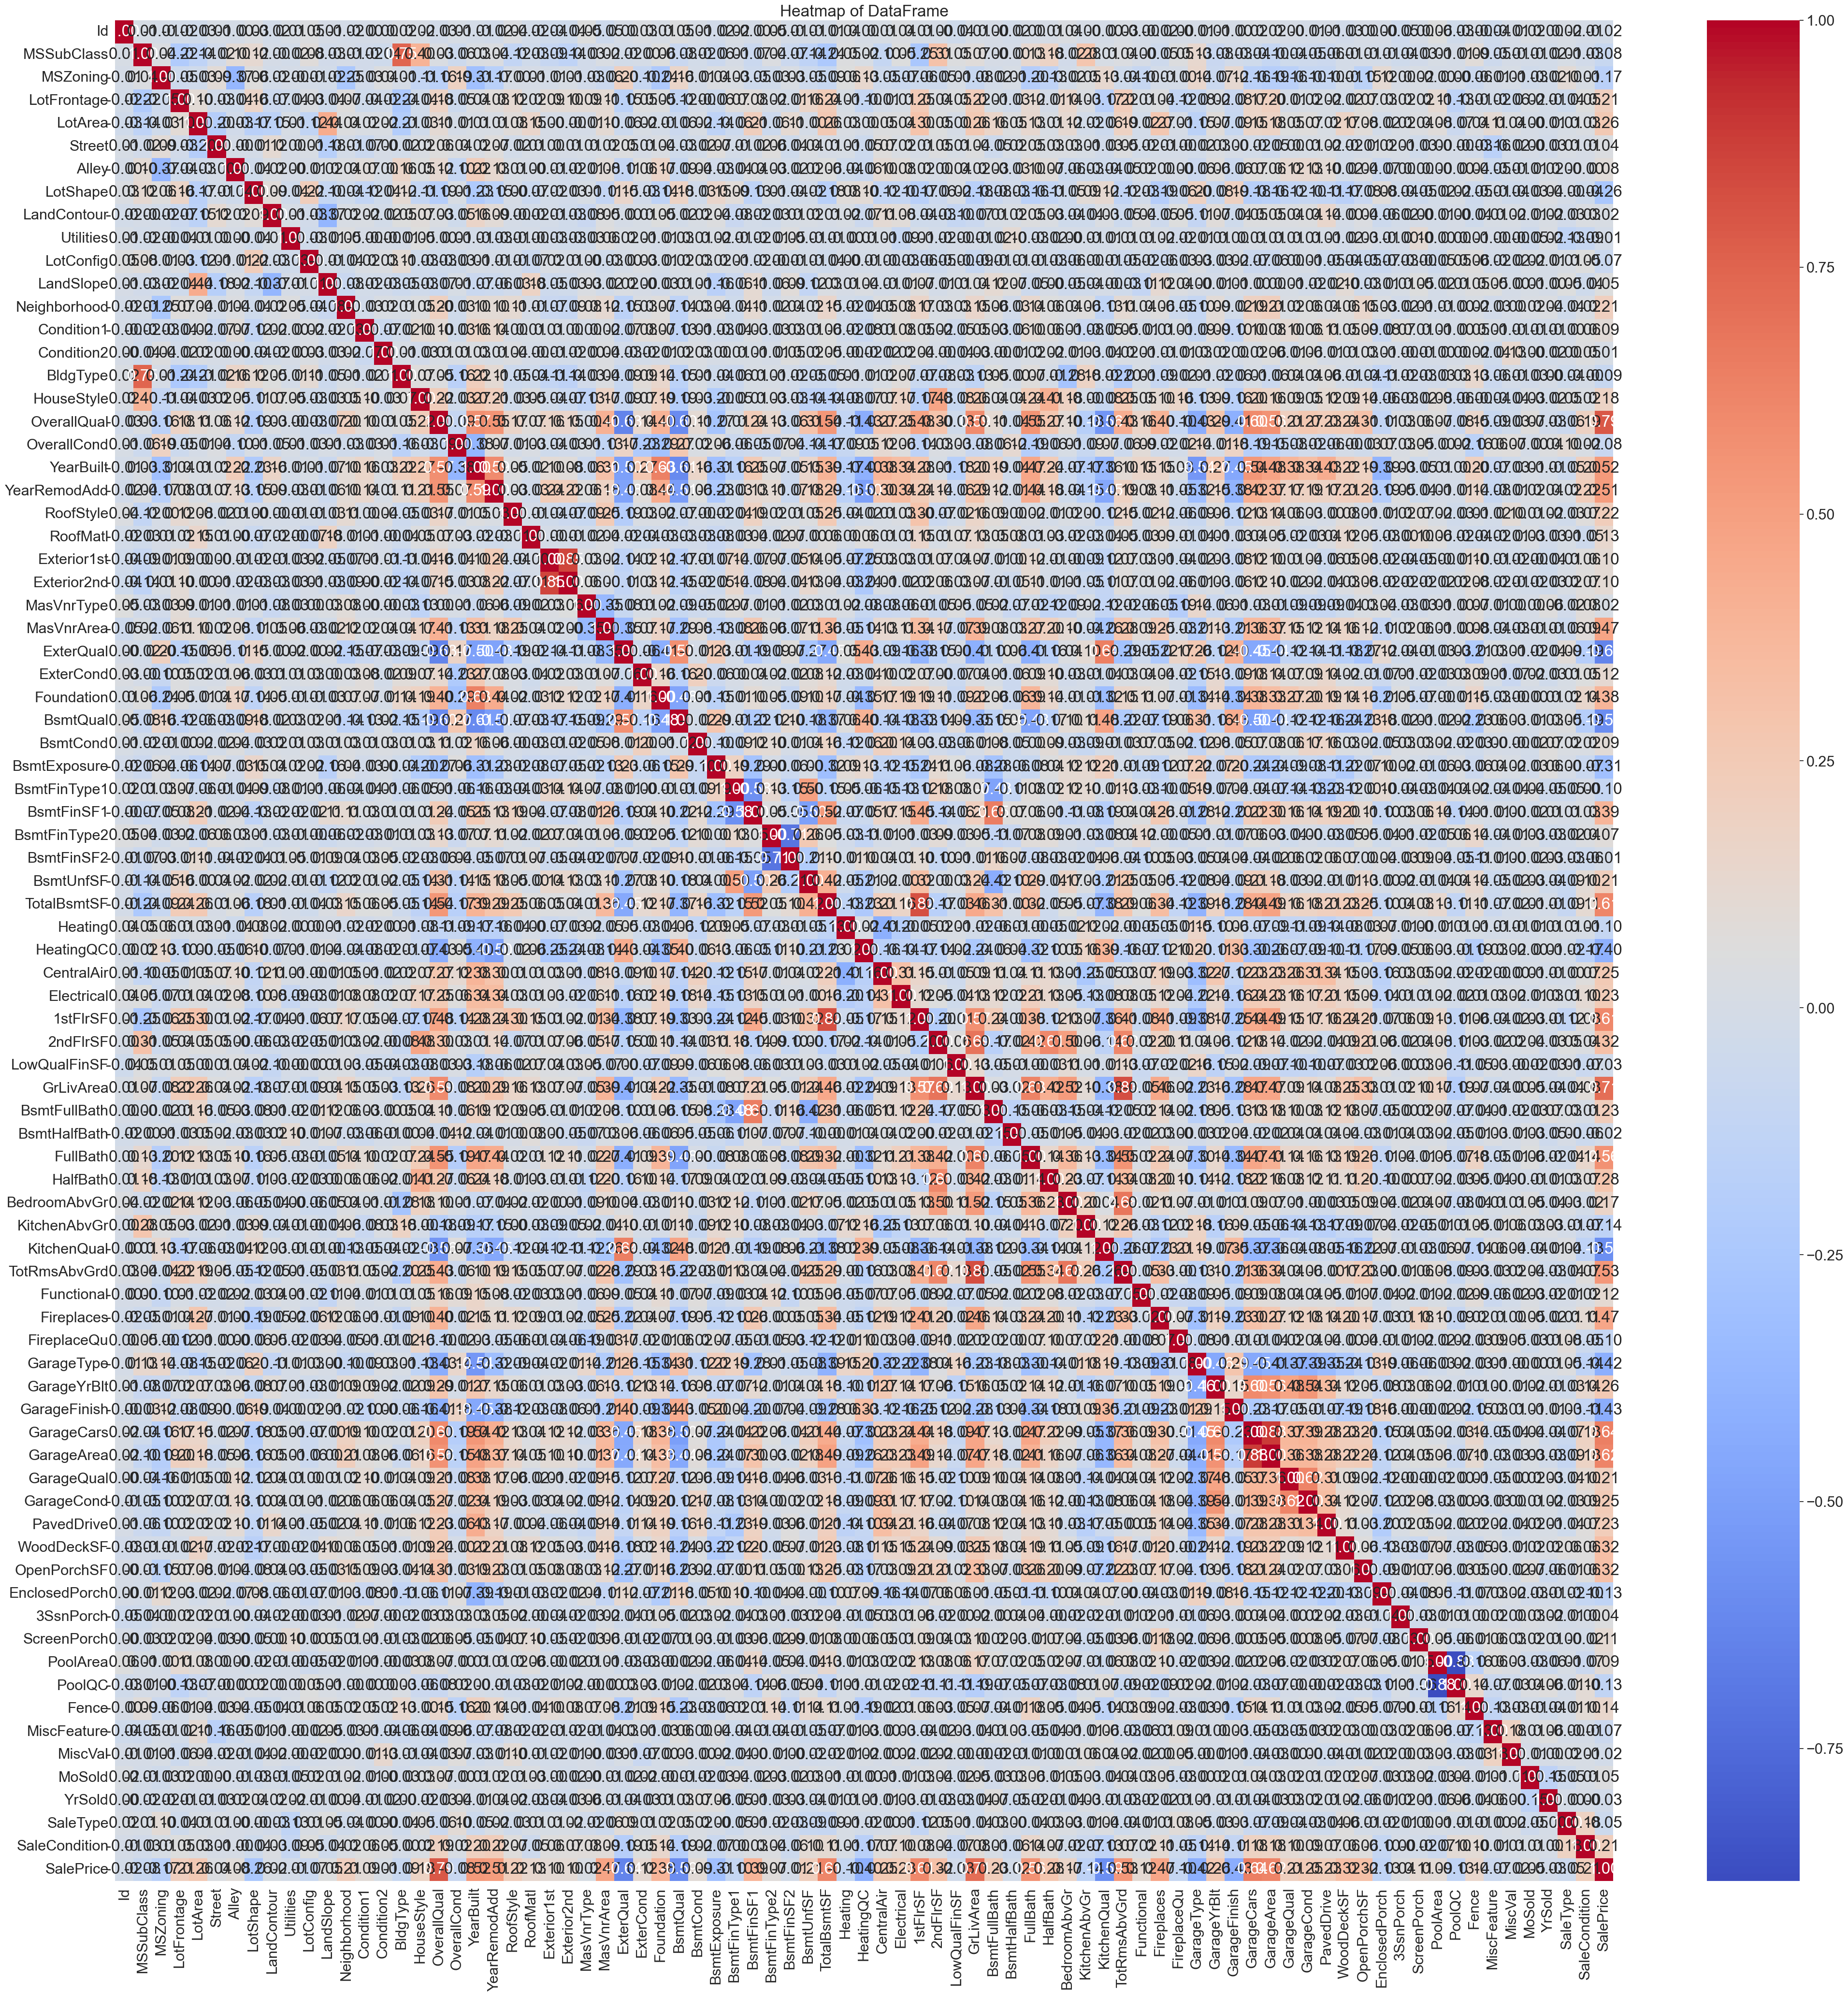

In [375]:
corr = df.corr()
plt.figure(figsize=(50,50))
sns.set(font_scale=2)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of DataFrame')
plt.show()

## Experiment 1

In [376]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [378]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

lr_model = lr.fit(X_train, y_train)

In [379]:
#look at the intercept and slope of the model. 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Get our coefficient of determination
print('Coefficient of Determination:',lr_model.score(X_test, y_test))

#creates table to show the features and their coefficients 
coeff_df = pd.DataFrame(lr_model.coef_, X_test.columns, columns=['Coefficients'])
coeff_df

Model Intercept: 2314091.9096704754
Model Slope: 0.47505572952469005
Coefficient of Determination: 0.8064781847667111


Coefficients
Id             4.750557e-01
MSSubClass    -1.190589e+02
MSZoning      -4.456118e+02
LotFrontage   -4.367855e+01
LotArea        3.515194e-01
Street         3.193054e+04
Alley          7.400662e+03
LotShape      -4.666340e+02
LandContour    3.636524e+03
Utilities      1.028678e-07
LotConfig      3.580145e+02
LandSlope      2.774387e+03
Neighborhood   5.172811e+02
Condition1    -6.115150e+02
Condition2    -1.318108e+04
BldgType      -2.097647e+03
HouseStyle    -1.392069e+03
OverallQual    1.211775e+04
OverallCond    5.717148e+03
YearBuilt      1.154240e+02
YearRemodAdd   9.521113e+00
RoofStyle      3.038536e+03
RoofMatl       5.291053e+03
Exterior1st   -2.577381e+02
Exterior2nd   -2.992807e+02
MasVnrType     4.502825e+03
MasVnrArea     3.667959e+01
ExterQual     -7.383107e+03
ExterCond      1.115838e+03
Foundation     4.559352e+02
BsmtQual      -4.997277e+03
BsmtCond       6.567861e+02
BsmtExposure  -4.327487e+03
BsmtFinType1  -8.507804e+02
BsmtFinSF1     2.003706e+00
BsmtFinType2   1.484959e+03
BsmtFinSF2     8.407676e+00
BsmtUnfSF     -4.204915e+00
TotalBsmtSF    6.206467e+00
Heating       -4.854875e+01
HeatingQC     -8.134703e+02
CentralAir     1.163504e+03
Electrical    -3.721949e+02
1stFlrSF       2.373239e+01
2ndFlrSF       2.152934e+01
LowQualFinSF  -2.707729e+01
GrLivArea      1.818444e+01
BsmtFullBath   7.027671e+03
BsmtHalfBath  -2.743026e+02
FullBath       4.664357e+03
HalfBath       9.056596e+02
BedroomAbvGr  -4.919069e+03
KitchenAbvGr  -1.355867e+04
KitchenQual   -8.152170e+03
TotRmsAbvGrd   4.679396e+03
Functional     3.382770e+03
Fireplaces     3.990360e+03
FireplaceQu   -1.268693e+03
GarageType    -6.764452e+01
GarageYrBlt   -1.072860e+01
GarageFinish  -1.060713e+03
GarageCars     1.243581e+04
GarageArea     3.818951e+00
GarageQual    -9.699729e+02
GarageCond     1.933976e+03
PavedDrive     2.018558e+03
WoodDeckSF     2.081179e+01
OpenPorchSF   -1.548368e+01
EnclosedPorch -1.591439e+01
3SsnPorch      2.418755e+01
ScreenPorch    4.265881e+01
PoolArea      -5.873560e+02
PoolQC        -1.529774e+05
Fence          5.457571e+02
MiscFeature   -1.403653e+03
MiscVal       -1.813184e-01
MoSold        -2.356968e+02
YrSold        -1.057822e+03
SaleType      -9.676159e+02
SaleCondition  3.647017e+03

In [381]:
y_pred = lr.predict(X_test)

print("RMSE: ",rmse(y_test,y_pred))

RMSE:  34296.23130073514


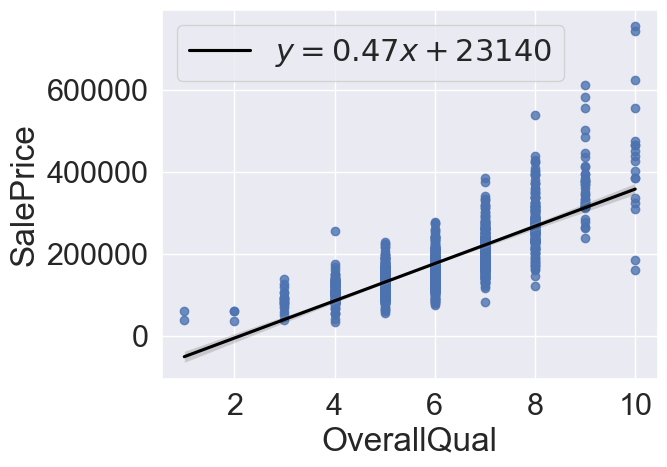

In [382]:
plot_rnet = sns.regplot(data = df,x="OverallQual", y="SalePrice",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})

plt.legend()


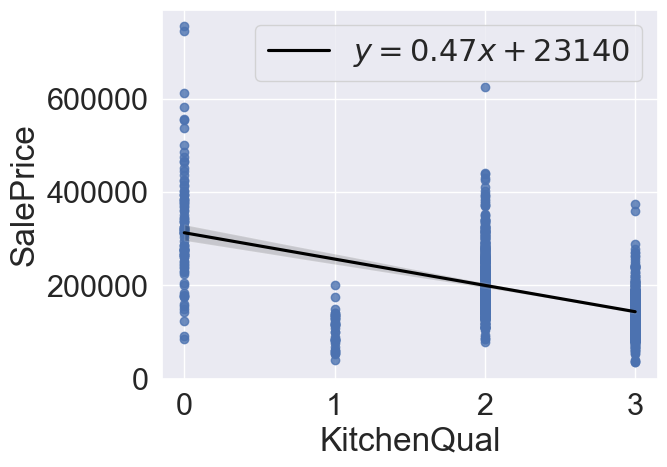

In [383]:
plot_rnet = sns.regplot(data = df,x="KitchenQual", y="SalePrice",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})

plt.legend()


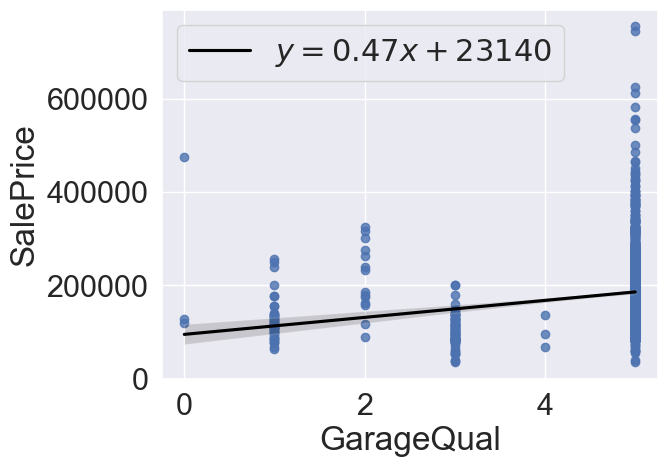

In [384]:
plot_rnet = sns.regplot(data = df,x="GarageQual", y="SalePrice",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})

plt.legend()


## Experiment 2

In [385]:
df_preLE['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'None', 'Ex', 'Po'], dtype=object)

In [386]:
#df_preLE.dtypes

In [387]:
df = df_preLE

for index, row in df.iterrows():
    for column in df.columns:
        if row[column] == 'Ex':
            df.at[index, column] = 5
        elif row[column] == 'Gd':
            df.at[index, column] = 4
        elif row[column] == 'TA':
            df.at[index, column] = 3
        elif row[column] == 'Fa':
            df.at[index, column] = 2
        elif row[column] == 'Po':
            df.at[index, column] = 1

In [388]:
df_preLE2 = df.copy()
df['GarageQual'].unique()

array([3, 2, 4, 'None', 5, 1], dtype=object)

In [389]:
for column in df.columns:
    if df[column].apply(lambda x: isinstance(x, str)).any() and df[column].apply(lambda x: isinstance(x, int)).any():
        df[column] = df[column].apply(lambda x: 0 if isinstance(x, str) else x)

In [390]:
df['GarageQual'].unique()

array([3, 2, 4, 0, 5, 1], dtype=int64)

In [391]:
le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

In [392]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lr = linear_model.LinearRegression()

lr_model = lr.fit(X_train, y_train)

In [394]:
#look at the intercept and slope of the model. 
print('Model Intercept:',lr_model.intercept_)
print('Model Slope:' ,lr_model.coef_[0])

#Get our coefficient of determination
print('Coefficient of Determination:',lr_model.score(X_test, y_test))

#creates table to show the features and their coefficients 
coeff_df = pd.DataFrame(lr_model.coef_, X_test.columns, columns=['Coefficients'])
coeff_df

Model Intercept: 2237086.9182709907
Model Slope: 0.23501976046629572
Coefficient of Determination: 0.8110299244079296


Coefficients
Id             2.350198e-01
MSSubClass    -1.442035e+02
MSZoning      -4.261547e+02
LotFrontage   -3.022885e+01
LotArea        2.541333e-01
Street         1.802042e+04
Alley          7.886158e+03
LotShape      -5.476366e+02
LandContour    3.399313e+03
Utilities      1.939114e-08
LotConfig      2.161645e+02
LandSlope      3.268329e+03
Neighborhood   4.905584e+02
Condition1    -6.109136e+02
Condition2    -1.309635e+04
BldgType      -1.928558e+03
HouseStyle    -1.271448e+03
OverallQual    1.299435e+04
OverallCond    5.400224e+03
YearBuilt      5.467678e+01
YearRemodAdd  -4.454563e+01
RoofStyle      3.886510e+03
RoofMatl       4.189650e+03
Exterior1st   -6.771198e+01
Exterior2nd   -5.581228e+02
MasVnrType     5.032743e+03
MasVnrArea     3.515926e+01
ExterQual      7.955212e+03
ExterCond     -2.280156e+03
Foundation     2.666880e+03
BsmtQual       1.144463e+04
BsmtCond      -8.214049e+03
BsmtExposure   4.487142e+03
BsmtFinType1  -1.521262e+03
BsmtFinSF1    -1.285777e+00
BsmtFinType2   6.560184e+02
BsmtFinSF2     4.746521e+00
BsmtUnfSF     -2.081619e+00
TotalBsmtSF    1.379125e+00
Heating        7.280467e+02
HeatingQC      1.991720e+03
CentralAir    -2.155152e+03
Electrical    -7.069185e+02
1stFlrSF       2.162232e+01
2ndFlrSF       1.841878e+01
LowQualFinSF  -1.828407e+01
GrLivArea      2.175703e+01
BsmtFullBath   8.062525e+03
BsmtHalfBath   4.180461e+03
FullBath       4.866783e+03
HalfBath       3.308395e+02
BedroomAbvGr  -6.685851e+03
KitchenAbvGr  -1.249818e+04
KitchenQual    9.145702e+03
TotRmsAbvGrd   4.856205e+03
Functional     3.387370e+03
Fireplaces     1.934981e+03
FireplaceQu    6.937124e+02
GarageType     3.735294e+02
GarageYrBlt   -1.794822e+01
GarageFinish  -1.325874e+03
GarageCars     1.454090e+04
GarageArea     5.629343e+00
GarageQual     3.195367e+03
GarageCond    -1.034305e+02
PavedDrive     1.700603e+03
WoodDeckSF     2.163555e+01
OpenPorchSF   -2.564400e+01
EnclosedPorch -9.517351e+00
3SsnPorch      2.108968e+01
ScreenPorch    4.319834e+01
PoolArea      -5.237665e+02
PoolQC         6.291033e+04
Fence          8.011058e+02
MiscFeature   -5.880717e+02
MiscVal        2.207906e-01
MoSold        -1.456664e+02
YrSold        -1.172001e+03
SaleType      -9.031057e+02
SaleCondition  3.114440e+03

In [395]:
y_pred = lr.predict(X_test)

print("RMSE: ",rmse(y_test,y_pred))

RMSE:  33890.49821697397


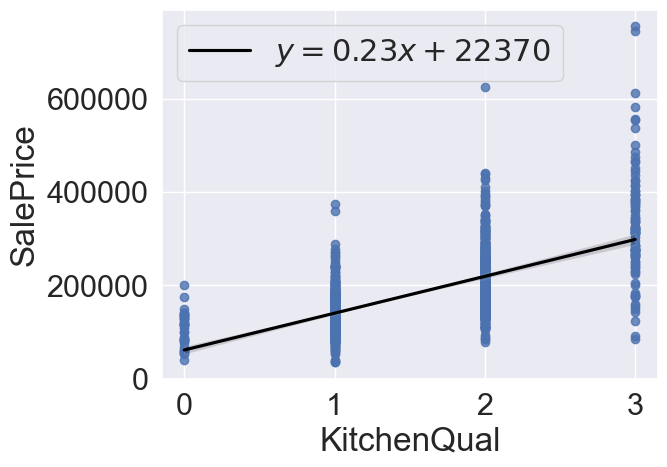

In [396]:
plot_rnet = sns.regplot(data = df,x="KitchenQual", y="SalePrice",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})

plt.legend()


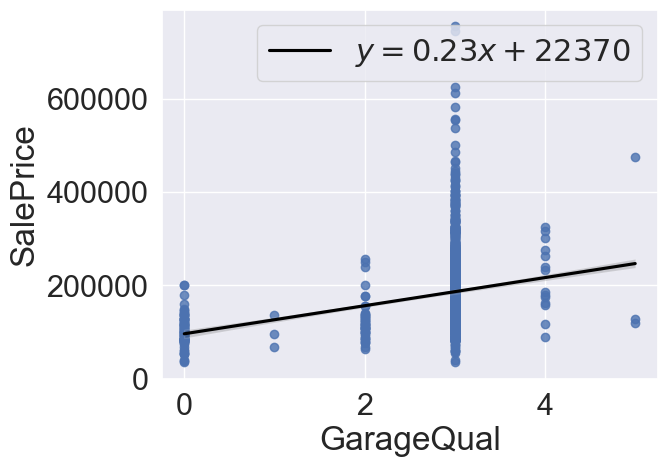

In [397]:
plot_rnet = sns.regplot(data = df,x="GarageQual", y="SalePrice",line_kws={'color':'black',
                                                                           'label':'$y=%5.4sx+%5.5s$'%(lr_model.coef_[0],lr_model.intercept_)})

plt.legend()


## Experiment 3

In [398]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X2_train = sma.add_constant(X_train)

est = sma.OLS(y_train, X2_train).fit()

In [399]:
from statsmodels.tools.eval_measures import rmse

print(est.summary())

ols_pred = est.predict(sma.add_constant(X_test))
print("\nRMSE",rmse(y_test,ols_pred))

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     72.95
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:13:13   Log-Likelihood:                -13767.
No. Observations:                1167   AIC:                         2.769e+04
Df Residuals:                    1089   BIC:                         2.809e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.237e+06   1.56e+06      1.431